In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import analyzeWiggles as aw
import pandas as pd
import numpy as np

mvpath = '../final/data/weekday/total_flow_weekday_mean_vector.pivot_2009_grouping_pca_tmp.csv'
datapath = '../../I15S_data2.csv'

## aw.smooth(meanDataPath, type, factor)

### Parameters
- ** meanDataPath **: Mean data as a csv file path.
- ** type **: The type of interpolation performed.  Options are akima, linear and cubic
- ** factor **: This is the value to scale the interpolated data to smooth. 

### Return Value
Returns a dictionary of arrays.
- **meanVector** is the mean vector stored in a numpy array
- **smoothedVector** is the long, smoothed vector stored in a numpy array
- **diffVector** is the difference between the meanVector and the long,
smoothed Vector and reflects the magnitude of the wiggles and is stored in a numpy array. This diffVector is normalized.
- **wiggleCoef** is the projection of data onto the wiggles and is stored in a numpy array
- **timelabels** is the index of each time increment (0-288)
- **b** is a flattened (2d) version of the pivoted traffic/flow data


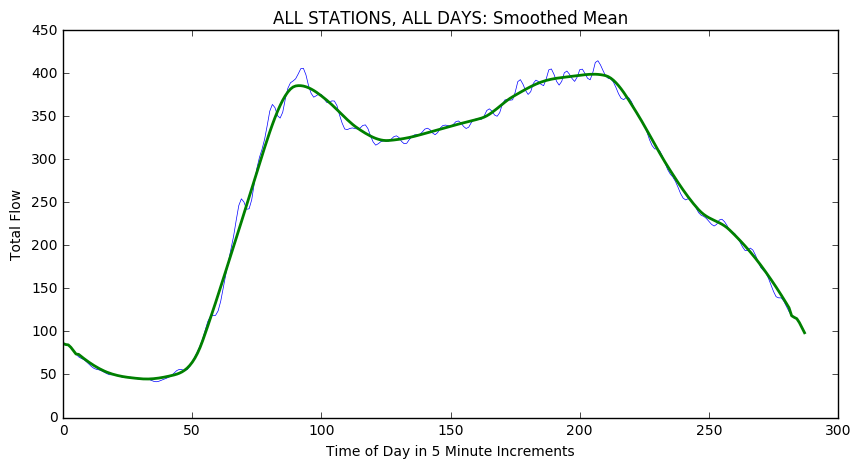

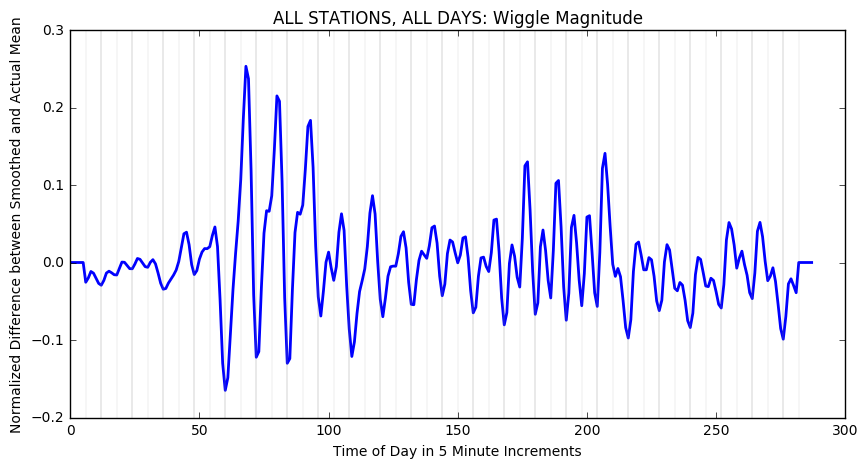

In [32]:
vectors = aw.smooth(mvpath, 'akima', 12)
plt.figure(figsize = (10,5))
plt.plot(vectors['meanVector'], linewidth=.5)
plt.plot(vectors['timelabels'], vectors['smoothedVector'], linewidth=2)
plt.title("ALL STATIONS, ALL DAYS: Smoothed Mean")
plt.xlabel('Time of Day in 5 Minute Increments')
plt.ylabel('Total Flow')
plt.show()

plt.figure(figsize = (10,5))
plt.plot(vectors['timelabels'],vectors['diffVector'], color="blue", linewidth=2)
plt.title("ALL STATIONS, ALL DAYS: Wiggle Magnitude")
for i in range(0,288,12):
    plt.axvline(x=i, linewidth=.25, color='gray')
    plt.axvline(x=i+6, linewidth=.1, color='gray')
    #plt.axvline(x=i+3, linewidth=.25, color='purple')
    #plt.axvline(x=i+9, linewidth=.25, color='purple')
plt.xlabel('Time of Day in 5 Minute Increments')
plt.ylabel('Normalized Difference between Smoothed and Actual Mean')
plt.show()

## aw.interpolate(meanVector, type, factor)

### Parameters
- ** meanVector **: Mean vector as a numpy array.
- ** type **: The type of interpolation performed.  Options are akima, linear and cubic
- ** factor **: This is the value to scale the interpolated data to smooth. 

### Return Value
Returns a list of two arrays.  The first array is an index (0 through 288) representing the time.  The second array is the values array.

<type 'numpy.ndarray'>


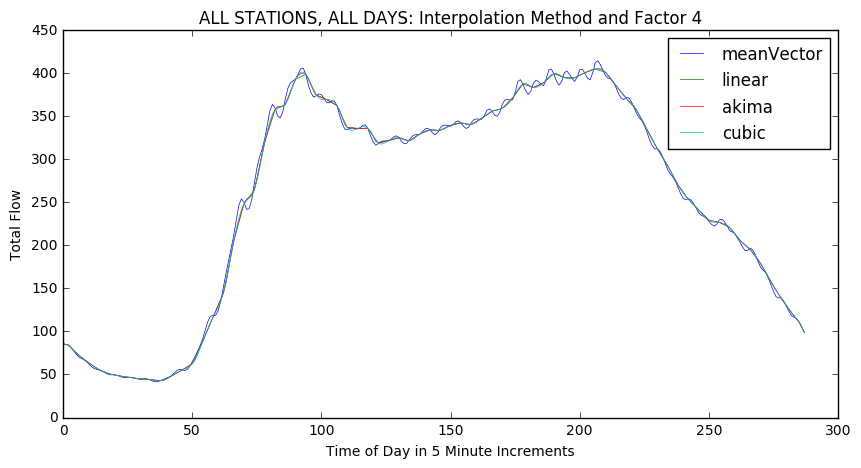

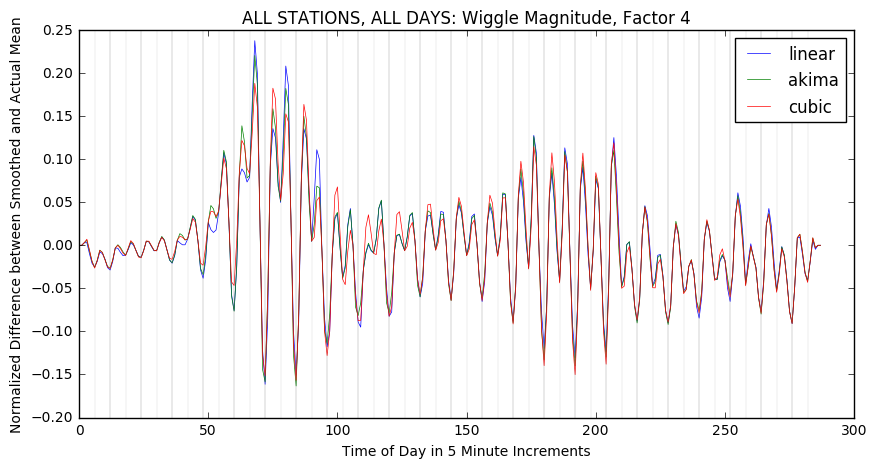

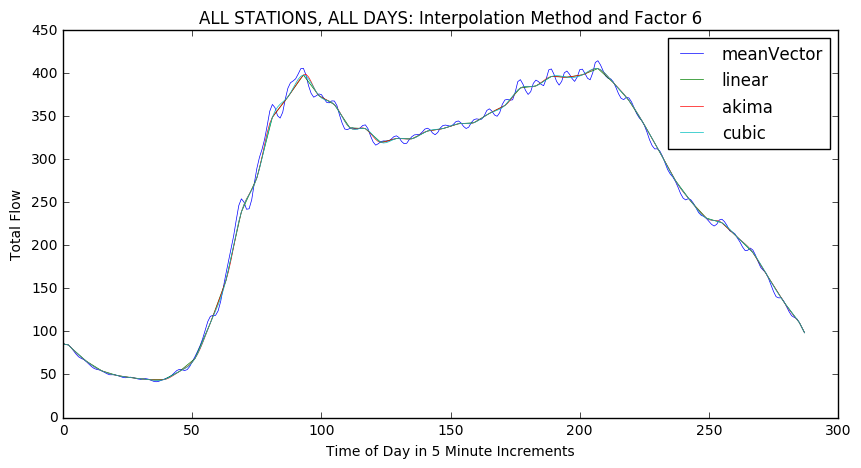

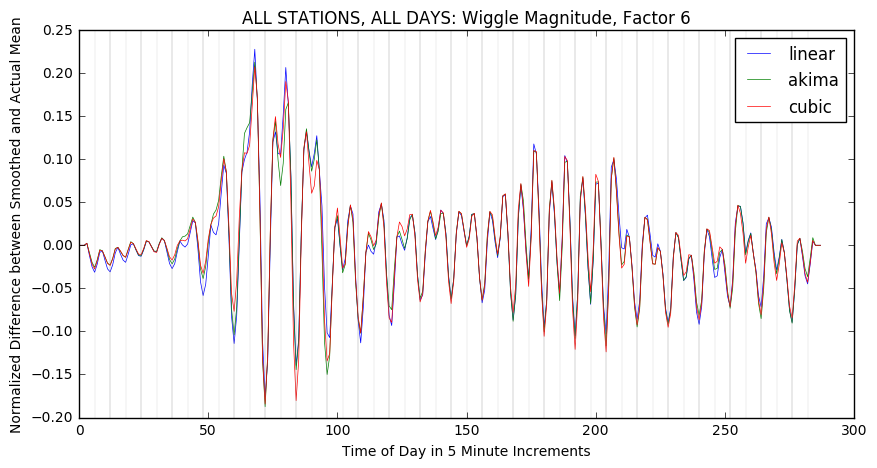

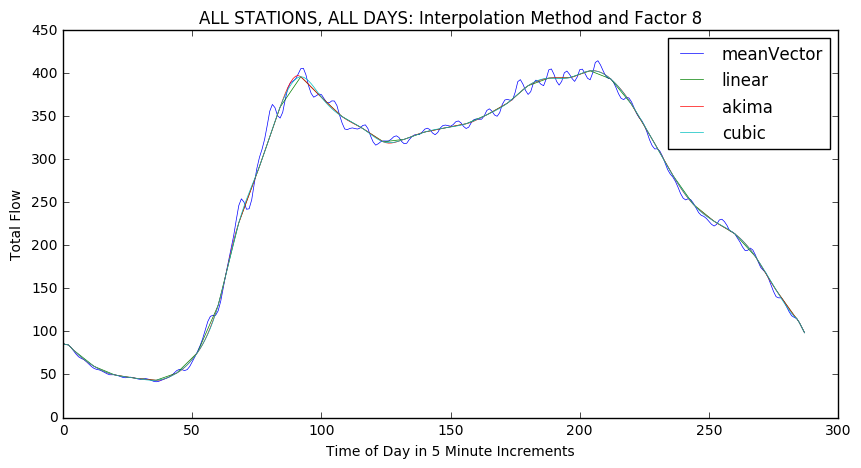

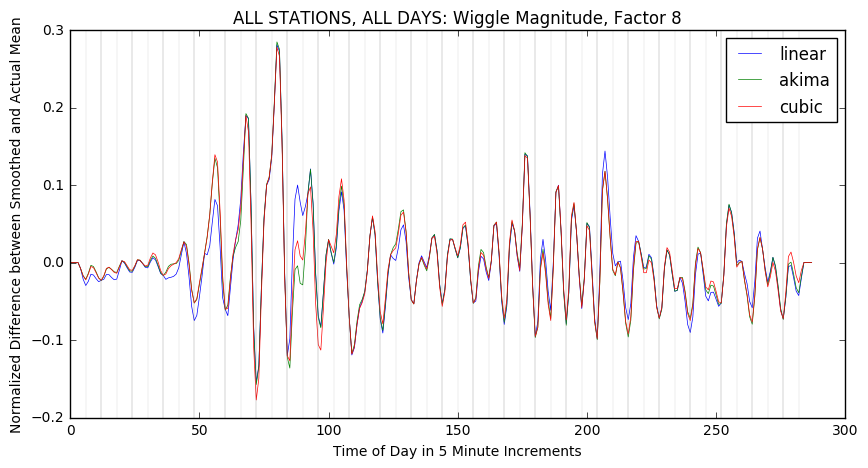

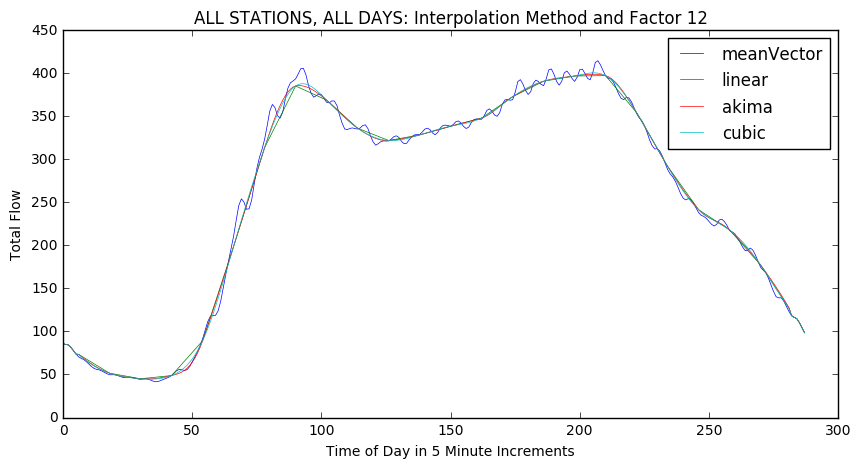

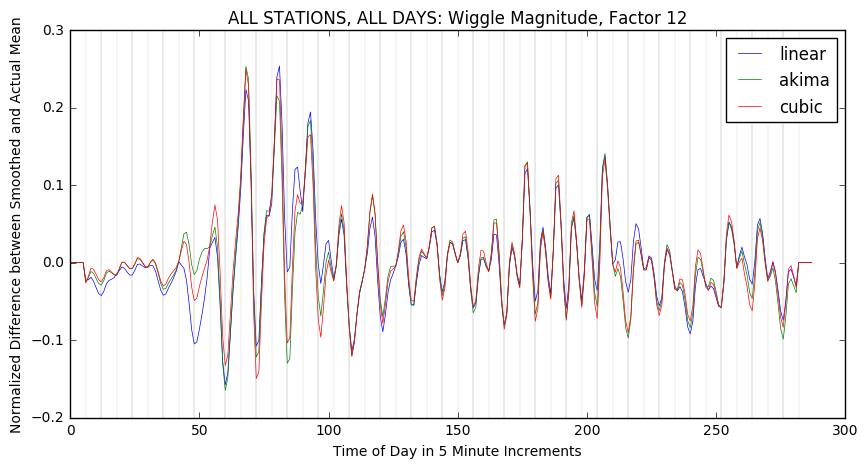

In [33]:
meanVector = pd.read_csv(mvpath, header=None).values[0]
print type(meanVector)

legendItems = ['meanVector']
for i in [4,6,8, 12]:
    plt.figure(figsize = (10,5))
    plt.plot(meanVector, linewidth=.5)
    for t in ['linear', 'akima', 'cubic']:
        interpolate = aw.interpolate(meanVector, t,i )
        plt.plot(interpolate[0], interpolate[1], linewidth=.5)
        legendItems.append(t+`i`)
    plt.legend([a for a in ['meanVector', 'linear', 'akima', 'cubic']])
    plt.title("ALL STATIONS, ALL DAYS: Interpolation Method and Factor "+ str(i))
    plt.xlabel('Time of Day in 5 Minute Increments')
    plt.ylabel('Total Flow')
    plt.show()
    
    plt.figure(figsize = (10,5))
    for t in ['linear', 'akima', 'cubic']:
        vectors = aw.smooth(mvpath, t, i)
        plt.plot(vectors['timelabels'],vectors['diffVector'], linewidth=.5)
    plt.legend([a for a in ['linear', 'akima', 'cubic']])
    plt.title("ALL STATIONS, ALL DAYS: Wiggle Magnitude, Factor " + str(i))
    for i in range(0,288,12):
        plt.axvline(x=i, linewidth=.25, color='gray')
        plt.axvline(x=i+6, linewidth=.1, color='gray')
    plt.xlabel('Time of Day in 5 Minute Increments')
    plt.ylabel('Normalized Difference between Smoothed and Actual Mean')
    plt.show()